## EDA of historical citibike ride data.
Data has been read into a sqlite3 database already.

## Some questions/figures to look at:
- Rides per year - is there a long-term trend 
- Rides per month
- Rides per day
- Rides per hour
- Rides per day of week
- Rides per station
- number of stations vs time

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
con = sqlite3.connect("data/citibike_database.db3")

First i'll examine the number of rides per month, for 2014. The plot below shows that there is a strong seasonal cycle, with more rides in the summer months. My hypothesis is that this is mainly driven by the temperature; I will get weather data later and test this.


## Total # of rides per yer. Complete years are 2014,2015,2016. ** 2016 missing last 2 months?
- Looks like ridership is increasing
- More rides, more users, more bikes, or both?

In [4]:
# rides per year - is there a trend in ridership?
#year = 2014
df = pd.read_sql_query("select year,count(*) as num_rides from rides group by year",con)
df

,year,num_rides
0,2013,5037185
1,2014,7642099
2,2015,9937969
3,2016,10262649


## Plot the total number of rides per month, for each year

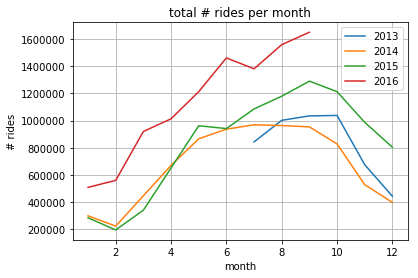

In [9]:
# count rides per month for one year
years = [2013,2014,2015,2016,2017]
for year in years:
    df = pd.read_sql_query("SELECT year,month,count(*) as num_rides FROM rides WHERE year=? GROUP BY month", con,params=[year])
    plt.plot(df.month, df.num_rides, label=str(year))
    #plt.scatter(df.month, df.num_rides)

plt.grid()
plt.xlabel('month')
plt.ylabel('# rides')
plt.legend();
plt.title('total # rides per month')

## Number of rides per day. 
This shows that there is a strong seasonal pattern, but also some big residuals from that pattern. These could be days that were unseasonably cold/warm, or due to other factors. 

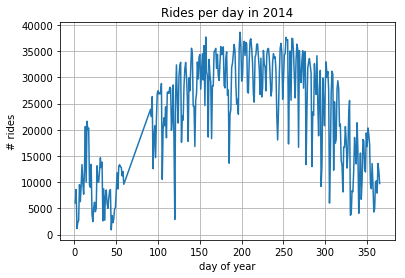

In [12]:
# plot rides/day for ONE year
year=2014
query = ('SELECT yday, count(*) as num_rides FROM rides WHERE year=? GROUP BY yday')
df = pd.read_sql_query(query, con, params=[year] )
plt.plot(df.yday,df.num_rides)
plt.grid()
plt.xlabel('day of year')
plt.ylabel('# rides')
plt.title('Rides per day in ' + str(year))

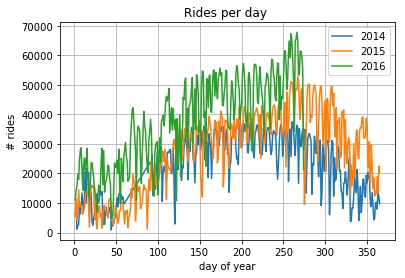

In [13]:
# for all years
years = [2013, 2014, 2015, 2016]
query = ('SELECT yday, count(*) as num_rides FROM rides WHERE year=? GROUP BY yday')

for year in years:
    df = pd.read_sql_query(query, con, params=[year] )
    plt.plot(df.yday, df.num_rides, label=str(year) )

plt.grid()
plt.xlabel('day of year')
plt.ylabel('# rides')
plt.title('Rides per day ')
plt.legend();

## Number of rides by hour. 
- There are two peaks - near 7-8am, and 17-18 pm, which probably correspond to people commuting during rush hour.
- This pattern is very similar each year

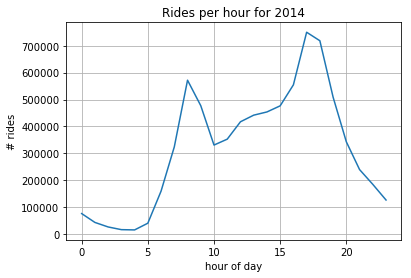

In [16]:
# For ONE year
year = 2014
df_hr = pd.read_sql_query("select hour,count(*) as num_rides from rides where year=? group by hour",con,params=[year])
plt.plot(df_hr.hour,df_hr.num_rides)
plt.grid()
plt.xlabel('hour of day')
plt.ylabel('# rides')
plt.title('Rides per hour for ' + str(year) )

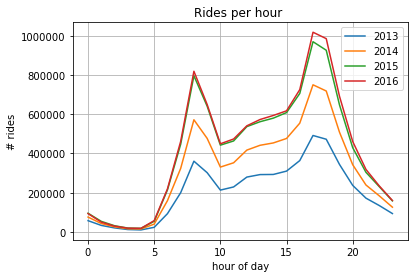

In [21]:
# For all years
years = [2013, 2014, 2015]
query = ('SELECT hour,count(*) as num_rides FROM rides WHERE year=? GROUP BY hour')

for year in years:
    df_hr = pd.read_sql_query(query, con, params=[year])
    plt.plot(df_hr.hour, df_hr.num_rides, label=str(year))

plt.grid()
plt.xlabel('hour of day')
plt.ylabel('# rides')
plt.title('Rides per hour ')
plt.legend();

## Number of rides vs day of week. 0 is Monday, 6 is Sunday. 
- There are significanlty less rides on the weekend. 


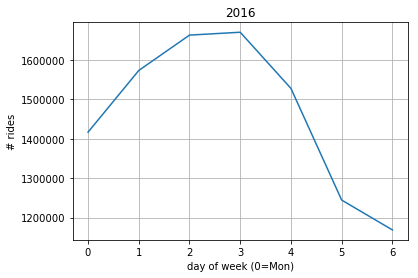

In [19]:
# For ONE year
year = 2016
query = "SELECT year,wkday,count(*) as num_rides FROM rides WHERE year=? GROUP BY wkday"
df_wkday = pd.read_sql_query(query, con, params=[year] )
plt.plot(df_wkday.wkday,df_wkday.num_rides)
plt.grid()
plt.xlabel('day of week (0=Mon)')
plt.ylabel('# rides')
plt.title(str(year))

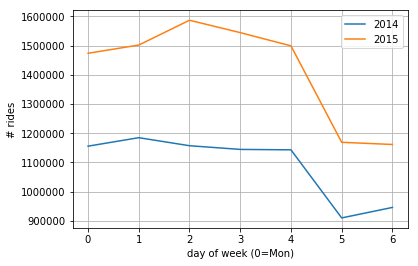

In [23]:
# For all comnplete years
# difference in magnitudes; maybe plot pdf instead?
years = [2014, 2015]
query = "SELECT year,wkday,count(*) as num_rides FROM rides WHERE year=? GROUP BY wkday"

for year in years:
    df_wkday = pd.read_sql_query(query, con, params=[year] )
    plt.plot(df_wkday.wkday,df_wkday.num_rides, label=str(year) )

plt.grid()
plt.xlabel('day of week (0=Mon)')
plt.ylabel('# rides')
#plt.title(
plt.legend();

## Rides per station.
- Stations change/move/open/close over time, so this might be tricky.
- Definitely few outliers with way more rides than most. Are these near transportation hubs? Do they have more bikes available? Have they been around longer?

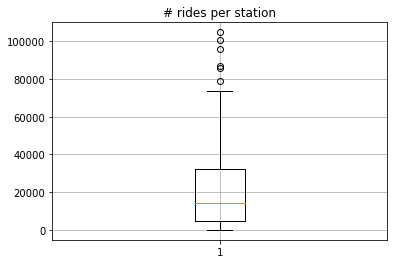

In [9]:
# Rides per station (* stations change over time?)
year=2015
query = "SELECT start_station_id, count(*) as num_rides FROM rides WHERE year=? GROUP BY start_station_id ORDER BY num_rides DESC"
df = pd.read_sql_query(query,con, params=[year])
plt.boxplot(df.num_rides);
plt.grid()
plt.title('# rides per station in ' + str(year) )

## Questions we could ask about stations
-

In [13]:

con.close()

In [ ]:
df = pd.read_sql_query("select start_station_id, start_station_name, count(*) as num_rides from rides where year=2014 group by start_station_id order by num_rides desc",con)

To-do:
- fit seasonal cycle and remove to examine anomalies
